## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

まずは指定のデータをダウンロードします。
Google Colaboratoryのセル上で下記のコマンドを実行すると、カレントディレクトリに対象のファイルがダウンロードされます。

In [1]:
%load_ext lab_black

In [2]:
!wget https://nlp100.github.io/data/neko.txt

--2021-12-12 11:18:26--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  1.43MB/s    in 0.7s    

2021-12-12 11:18:27 (1.43 MB/s) - ‘neko.txt’ saved [975789/975789]



続いて、MeCabをインストールします。

形態素解析を行います。
以下のコマンドを実行することにより、neko.txtを形態素解析した結果が、neko.txt.mecabとして出力されます。



In [3]:
!mecab -o ./neko.txt.mecab ./neko.txt

出力結果を確認します。

In [4]:
# 行数の確認
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [5]:
# 先頭15行の確認
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


#### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
filename = "./neko.txt.mecab"

sentences = []
morphs = []
with open(filename, mode="r") as f:
    for line in f:  # 1行ずつ読込
        if line != "EOS\n":  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
            fields = line.split("\t")
            if len(fields) != 2 or fields[0] == "":  # 文頭以外の空白と改行文字はスキップ
                continue
            else:
                attr = fields[1].split(",")
                morph = {
                    "surface": fields[0],
                    "base": attr[6],
                    "pos": attr[0],
                    "pos1": attr[1],
                }
                morphs.append(morph)
        else:  # 文末：形態素リストを文リストに追加
            sentences.append(morphs)
            morphs = []

# 確認
for morph in sentences[2]:
    print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#### 31. 動詞
動詞の表層形をすべて抽出せよ．

以降、30で作成したsentencesに対して処理を行っていきます。
ここで結果を格納しているset型は、集合を表すデータ型であり重複を許しません。ですので、何も考えずに要素を追加していっても自然と重複のない結果を得られるため、本問のようなケースで便利です。

In [7]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] == "動詞":
            ans.add(morph["surface"])  # set型なので重複しない要素のみ保持していく

# 確認
print(f"動詞の表層形の種類: {len(ans)}\n")
print("---サンプル---")
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 3893

---サンプル---
抛り出し
負え
すぎ
逃げ出す
なる
突き合せ
捨てる
こん
切っ
這い出す


#### 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [8]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] == "動詞":
            ans.add(morph["base"])

# 確認
print(f"動詞の原形の種類: {len(ans)}\n")
print("---サンプル---")
for v in list(ans)[:10]:
    print(v)

動詞の原形の種類: 2300

---サンプル---
嘲る
まじる
逃げ出す
生す
なる
捨てる
あげる
嵌る
這い出す
入り込む


#### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence) - 1):
        if (
            sentence[i - 1]["pos"] == "名詞"
            and sentence[i]["surface"] == "の"
            and sentence[i + 1]["pos"] == "名詞"
        ):
            ans.add(
                sentence[i - 1]["surface"]
                + sentence[i]["surface"]
                + sentence[i + 1]["surface"]
            )

# 確認
print(f"「名詞+の+名詞」の種類: {len(ans)}\n")
print("---サンプル---")
for n in list(ans)[:10]:
    print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
本人の性行
獅子の洞
狂の異名
頭の営養
うちの主人
御殿の中
芸者の妻君
車夫の先祖
内の三
自分の損


#### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

文ごとに、最初の形態素から順に以下のルールを適用し、名詞の連接を最長一致で抽出しています。

1. 名詞であればnounsに連結し、連結数(num)をカウント
2. 名詞以外の場合、ここまでの連結数が2以上であれば出力し、nounsとnumを初期化
3. それ以外の場合、nounsとnumを初期化

In [10]:
ans = set()
for sentence in sentences:
    nouns = ""
    num = 0
    for morph in sentence:
        if morph["pos"] == "名詞":  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
            nouns = "".join([nouns, morph["surface"]])
            num += 1
        elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
            ans.add(nouns)
            nouns = ""
            num = 0
        else:  # それ以外の場合、nounsとnumを初期化
            nouns = ""
            num = 0
    if num >= 2:
        ans.add(nouns)

# 確認
print(f"連接名詞の種類: {len(ans)}\n")
print("---サンプル---")
for n in list(ans)[:10]:
    print(n)

連接名詞の種類: 4457

---サンプル---
帰天斎正一
忙中自ら閑
甘木先生
僧共
素晴
直径一寸
ヴァイオリン癲癇
怨ずる
智無能
一偉観


#### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [11]:
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for w in ans[:10]:
    print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


#### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

matplotlibで日本語を表示させるため、japanize_matplotlibをインストールしておきます。

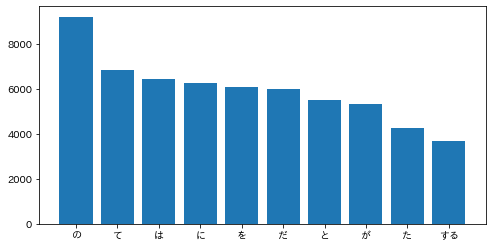

In [12]:
import japanize_matplotlib
import matplotlib.pyplot as plt

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

#### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

ここでは特に指示がないため品詞を選択していませんが、目的によっては助詞等を除くことによって、より意味のありそうな結果になると思います。



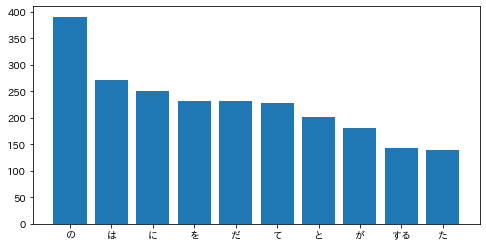

In [13]:
ans = defaultdict(int)
for sentence in sentences:
    if "猫" in [morph["surface"] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
        for morph in sentence:
            if morph["pos"] != "記号":
                ans[morph["base"]] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans["猫"]
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

#### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

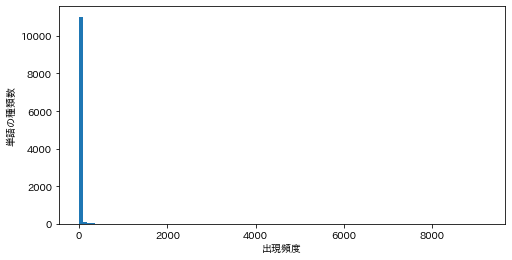

In [14]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

#### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

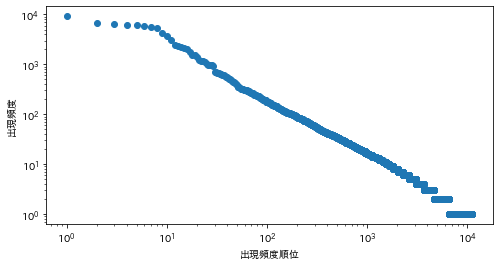

In [15]:
import math

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.show()